# **Coffee Sales EDA and Prediction**

This project aims to analyze a coffee sales dataset to understand sales patterns and customer behavior. It also explores different machine learning models to predict daily sales and uses Facebook Prophet for time series forecasting.

## **Key objectives are:**

1. Perform Exploratory Data Analysis (EDA) to understand trends across time (hourly, daily, monthly), coffee types, and payment methods.

2. Preprocess data for machine learning modeling.

3. Create and evaluate various regression models (*Random* Forest, XGBoost) to predict daily sales.

4. Use Facebook Prophet to predict daily sales for the next 14 days.

5. Visualize key findings and model performance.


# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [2]:
df = pd.read_csv("index.csv")

In [3]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


# **Understand And Organize the Dataset**

In [4]:
df.shape

(1133, 6)

In [5]:
df[df.duplicated()]

,date,datetime,cash_type,card,money,coffee_name


In [6]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [7]:
df.drop('card', axis=1, inplace=True)

In [8]:
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   money        1133 non-null   float64
 4   coffee_name  1133 non-null   object 
dtypes: float64(1), object(4)
memory usage: 44.4+ KB


# **Feauture Engineering**

In [10]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Extract month, and day
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [12]:
# Convert 'datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
# Extract features
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df['day_of_week'] = df['datetime'].dt.dayofweek
df['weekday_name'] = df['datetime'].dt.day_name()

In [14]:
df.head()

,date,datetime,cash_type,money,coffee_name,month,day,hour,minute,second,day_of_week,weekday_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte,3,1,10,15,50,4,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,3,1,12,19,22,4,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,3,1,12,20,18,4,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano,3,1,13,46,33,4,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte,3,1,13,48,14,4,Friday


# **EDA (Exploratory Data Analysis)**

## **Most Popular Coffee Type**

In [15]:
coffee_popularity = df['coffee_name'].value_counts()
coffee_popularity

,count
coffee_name,
Americano with Milk,268
Latte,243
Cappuccino,196
Americano,169
Cortado,99
Hot Chocolate,74
Espresso,49
Cocoa,35


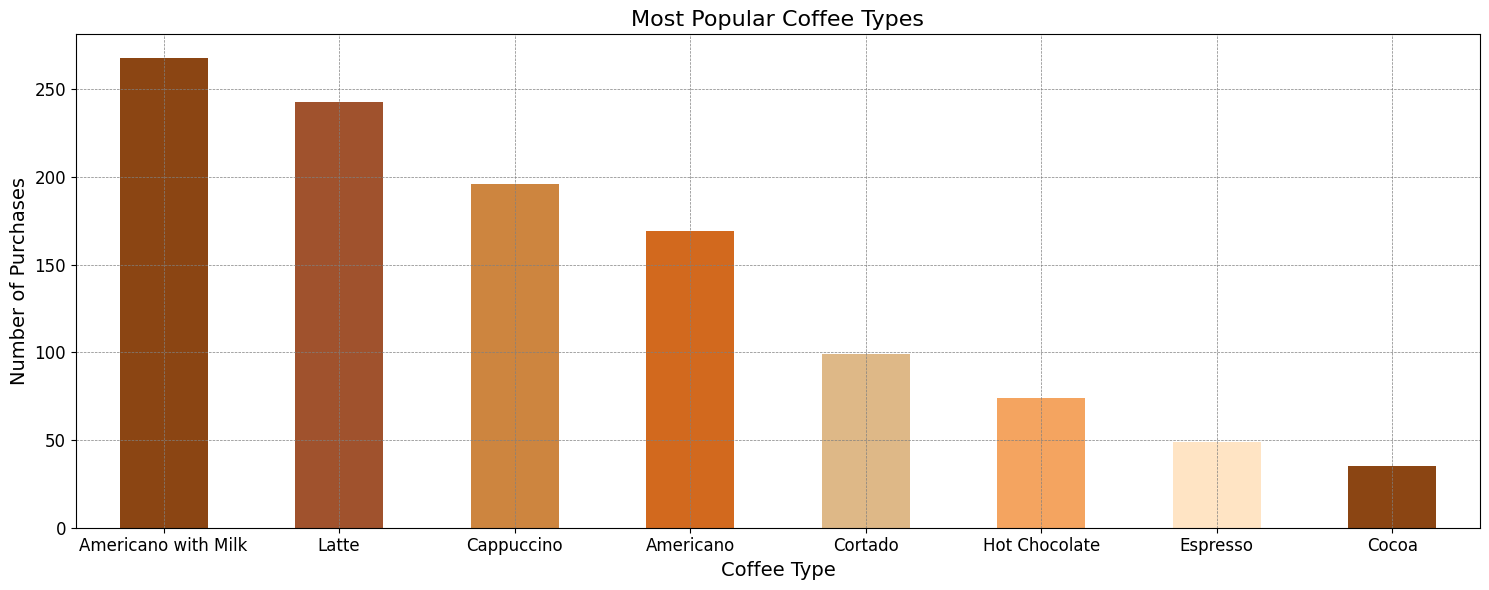

In [16]:
# Define custom colors (adjust length to match number of coffee types)
custom_colors = ['#8B4513', '#A0522D', '#CD853F', '#D2691E', '#DEB887', '#F4A460', '#FFE4C4']

# Plot
plt.figure(figsize=(15, 6))
coffee_popularity.plot(kind='bar', color=custom_colors[:len(coffee_popularity)])
plt.title('Most Popular Coffee Types', fontsize=16)
plt.xlabel('Coffee Type', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

## How is revenue distributed among coffee types?

<ipython-input-17-3755522854>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_coffee.index, y=revenue_by_coffee.values, palette='plasma')


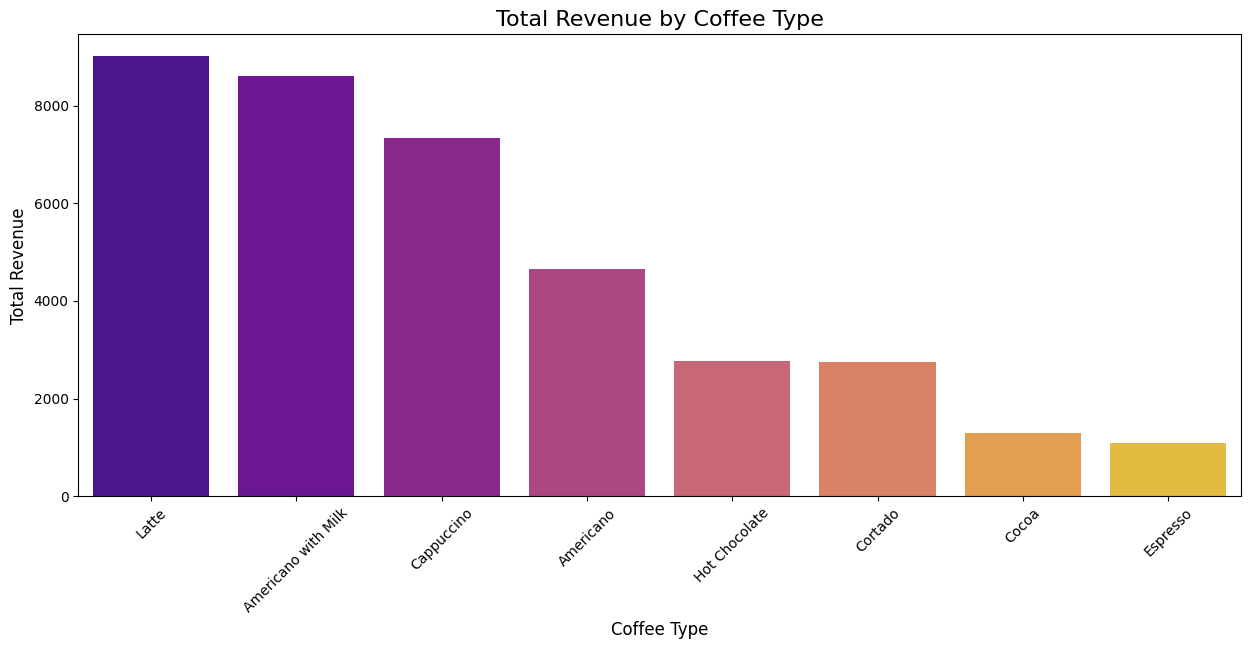

In [17]:
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=revenue_by_coffee.index, y=revenue_by_coffee.values, palette='plasma')
plt.title('Total Revenue by Coffee Type', fontsize=16)
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Coffee Sales per Hour of Day**

<ipython-input-18-3145114381>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='cubehelix')


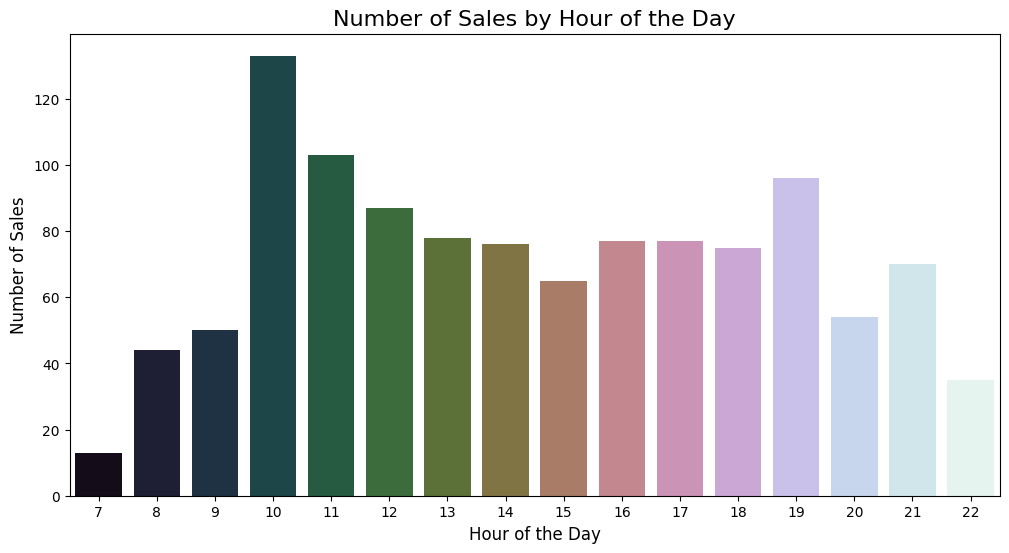

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='cubehelix')
plt.title('Number of Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.show()

## **Payment Method Distribution**

In [19]:
cash_or_card = df['cash_type'].value_counts()
cash_or_card

,count
cash_type,
card,1044
cash,89


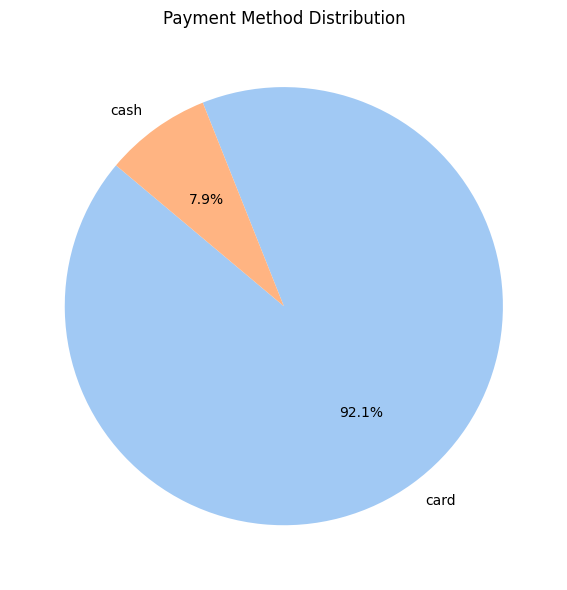

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(
    cash_or_card,
    labels=cash_or_card.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title('Payment Method Distribution')
plt.tight_layout()
plt.show()

## **Sales by Weekday and Coffee Type**

<ipython-input-21-3753643478>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_weekday_coffee = df.groupby(['weekday_name', 'coffee_name'])['money'].sum().reset_index()


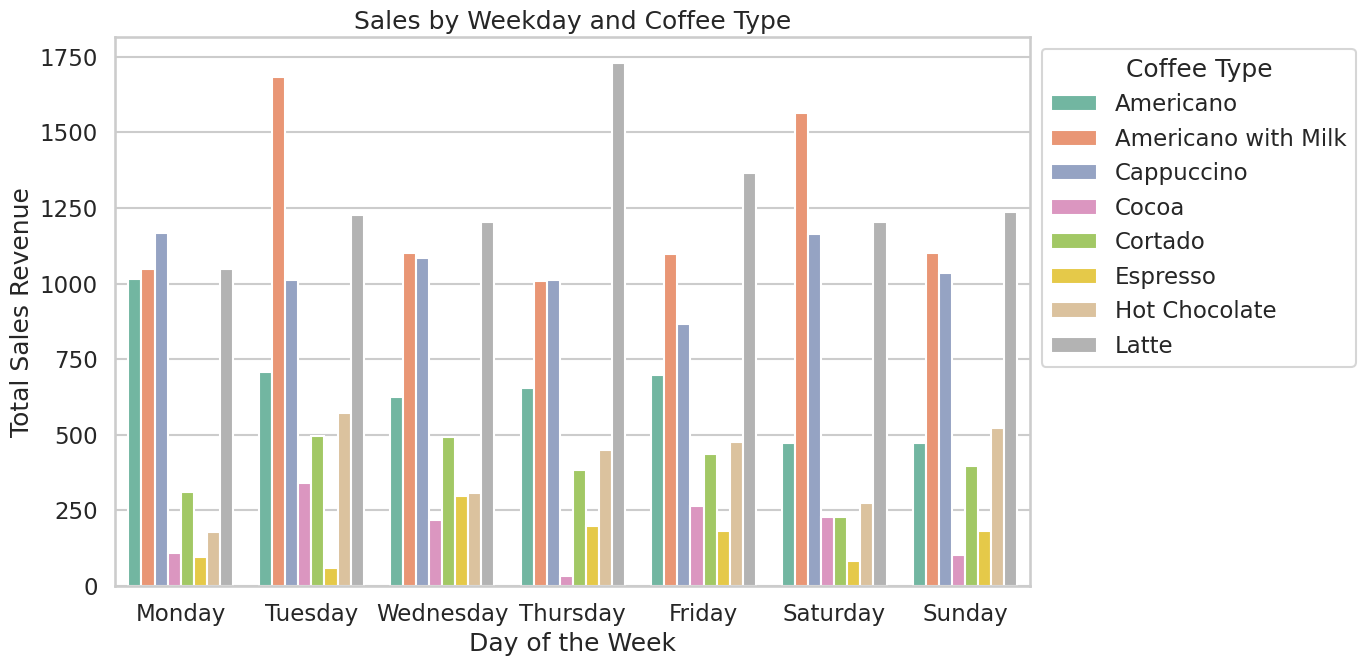

In [21]:
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure 'weekday_name' is a categorical type with the specified order
df['weekday_name'] = pd.Categorical(df['weekday_name'], categories=weekday_order, ordered=True)

# Group by 'weekday_name' and 'coffee_name', then sum the 'money' column
sales_by_weekday_coffee = df.groupby(['weekday_name', 'coffee_name'])['money'].sum().reset_index()

# Set the style for better visuals
sns.set(style="whitegrid")
sns.set_context("talk")

# Plotting the grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_weekday_coffee, x='weekday_name', y='money', hue='coffee_name', palette='Set2')

# Adding labels and title
plt.title("Sales by Weekday and Coffee Type")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales Revenue")

# Move the legend to the upper left
plt.legend(title='Coffee Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

## **Sales by Hour and Coffee Type**

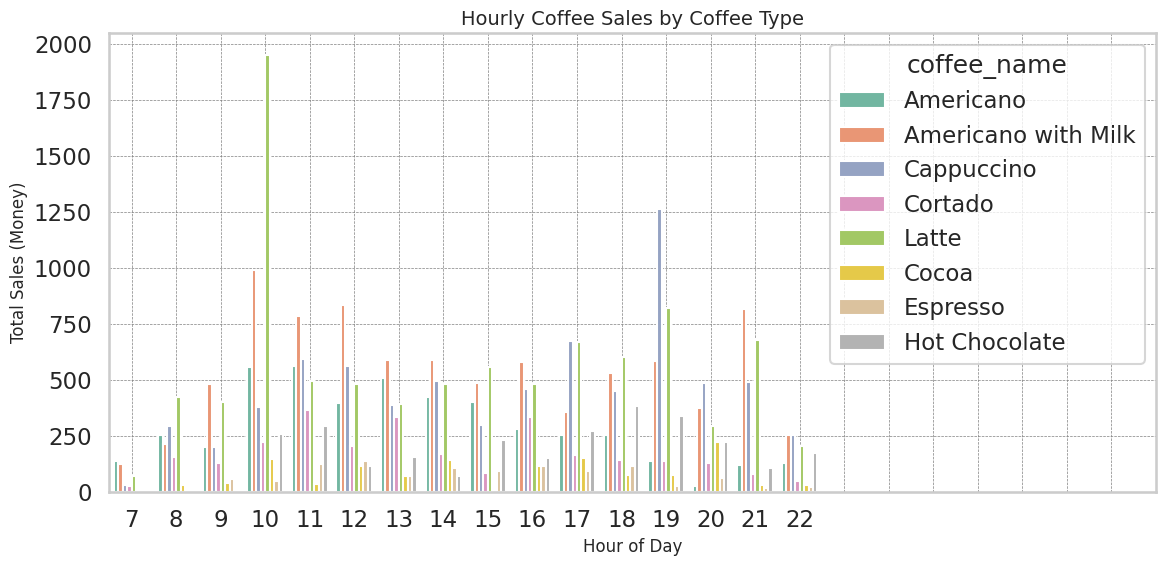

In [22]:
# Group by hour and coffee_name, summing money
hourly_sales = df.groupby(['hour', 'coffee_name'])['money'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='hour', y='money', hue='coffee_name', palette='Set2')

# Plot labels and style
plt.title('Hourly Coffee Sales by Coffee Type', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales (Money)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()

plt.show()

## **Daily Sales for the Year**

In [23]:
daily_sales = df.groupby(df['datetime'].dt.date )['money'].sum()

In [24]:
daily_sales

,money
datetime,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2024-07-27,372.76
2024-07-28,78.86
2024-07-29,321.82


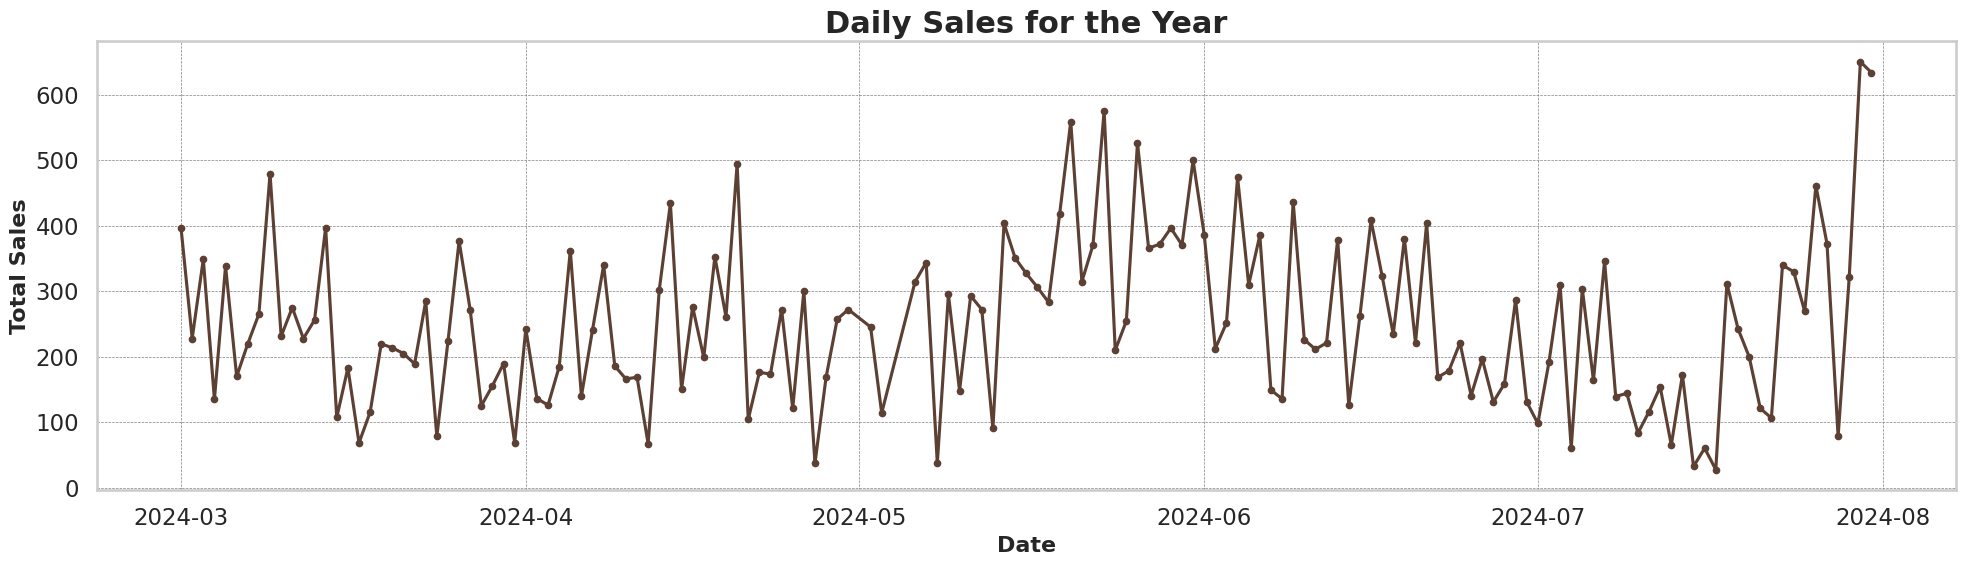

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='.', linestyle='-', color = "#5C4033")
plt.title('Daily Sales for the Year', fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=16, fontweight='bold')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

## **Coffee Sales Count by Hour of the Day and Day of the Week**

In [26]:
daily_hourly_summary = df.groupby(['weekday_name', 'hour'])\
    .agg({'money': ['count', 'sum', 'mean']}).reset_index()
daily_hourly_summary.head()

<ipython-input-26-2837070017>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_hourly_summary = df.groupby(['weekday_name', 'hour'])\


weekday_name hour money                   
                    count     sum       mean
0       Monday    7     2   65.64  32.820000
1       Monday    8     4  106.78  26.695000
2       Monday    9     5  134.70  26.940000
3       Monday   10    25  850.22  34.008800
4       Monday   11    22  709.20  32.236364

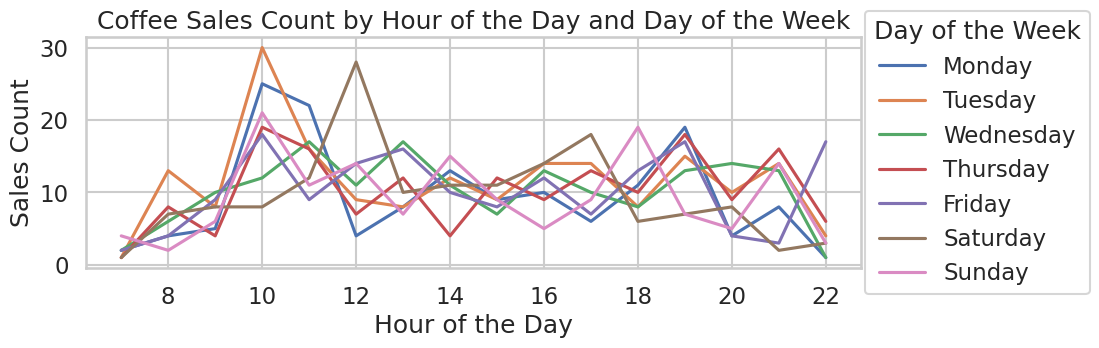

In [27]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'count'), hue='weekday_name') # Changed 'Day of Week' to 'weekday_name'
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.title('Coffee Sales Count by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **Coffee Sales Sum by Hour of the Day and Day of the Week**

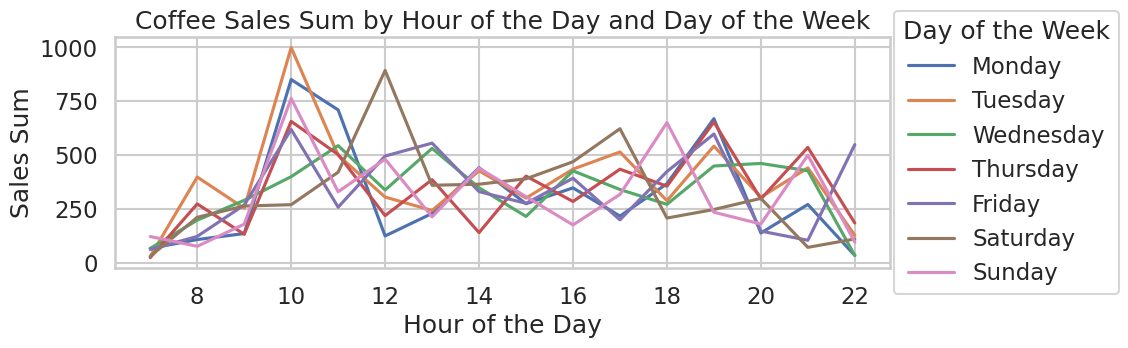

In [28]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'sum'), hue='weekday_name') # Changed 'Day of Week' to 'weekday_name'
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Sum')
plt.title('Coffee Sales Sum by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **Coffee Sales Average by Hour of the Day and Day of the Week**

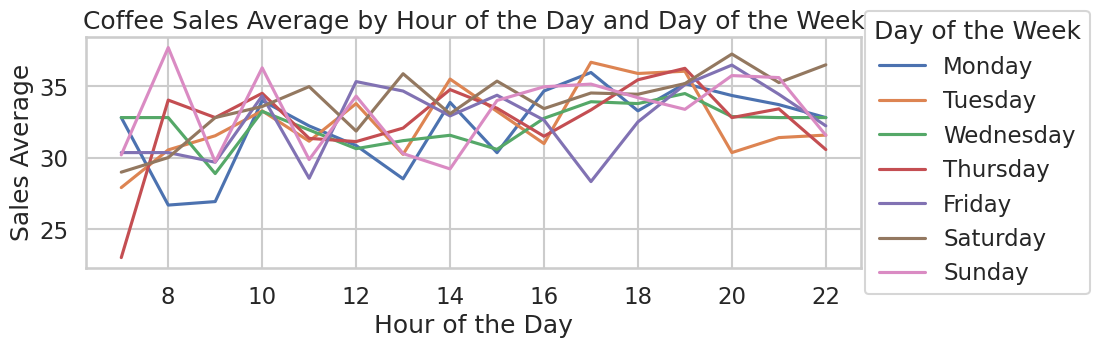

In [29]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'mean'), hue='weekday_name') # Changed 'Day of Week' to 'weekday_name'
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Average')
plt.title('Coffee Sales Average by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **Monthly Sales Revenue**

In [30]:
df["monthly_sales"] = df.groupby(["month", "coffee_name"])["money"].transform("sum")

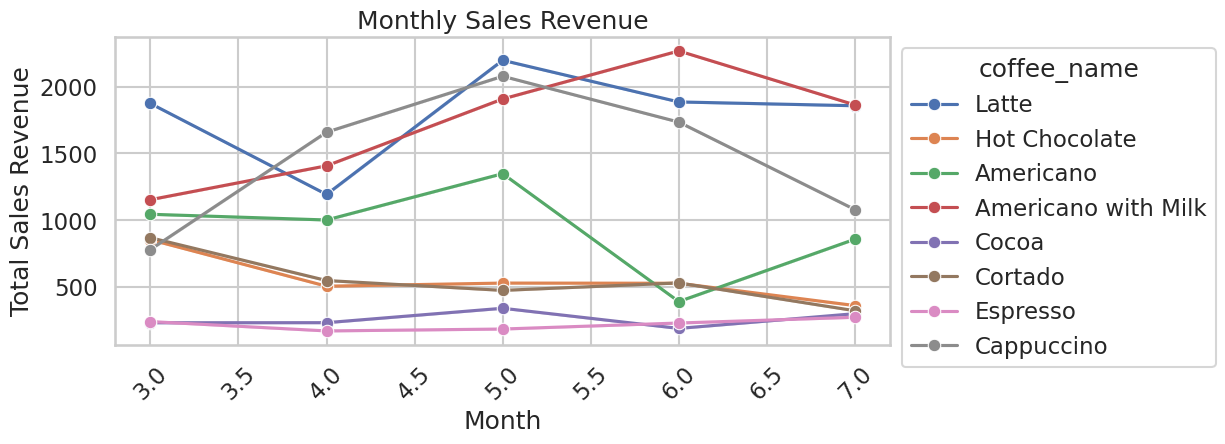

In [31]:
plt.figure(figsize=(10, 4))

sns.set(style="whitegrid")
sns.set_context("talk")

ax = sns.lineplot(data=df, x="month", y="monthly_sales", hue="coffee_name", marker="o")

# Grafik ayarları
plt.title("Monthly Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.xticks(rotation=45)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

## **Daily Sales Revenue**

In [32]:
df["daily_sales"] = df.groupby(["day", "coffee_name"])["money"].transform("sum")

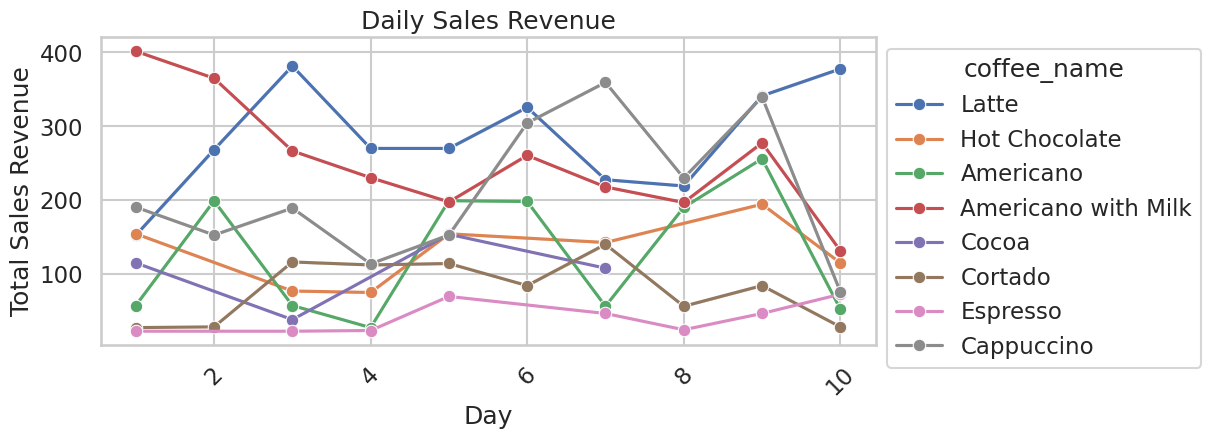

In [33]:
# Get the first 10 unique days
ten_days = df['day'].drop_duplicates().sort_values().head(10)

# Filter the DataFrame to include only those days
filtered_df = df[df['day'].isin(ten_days)]

# Plotting
plt.figure(figsize=(10, 4))

sns.set(style="whitegrid")
sns.set_context("talk")

ax = sns.lineplot(data=filtered_df, x="day", y="daily_sales", hue="coffee_name", marker="o")

plt.title("Daily Sales Revenue")
plt.xlabel("Day")
plt.ylabel("Total Sales Revenue")
plt.xticks(rotation=45)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

## **Hourly Sales Revenue**


In [34]:
df["hourly_sales"] = df.groupby(["hour", "coffee_name"])["money"].transform("sum")

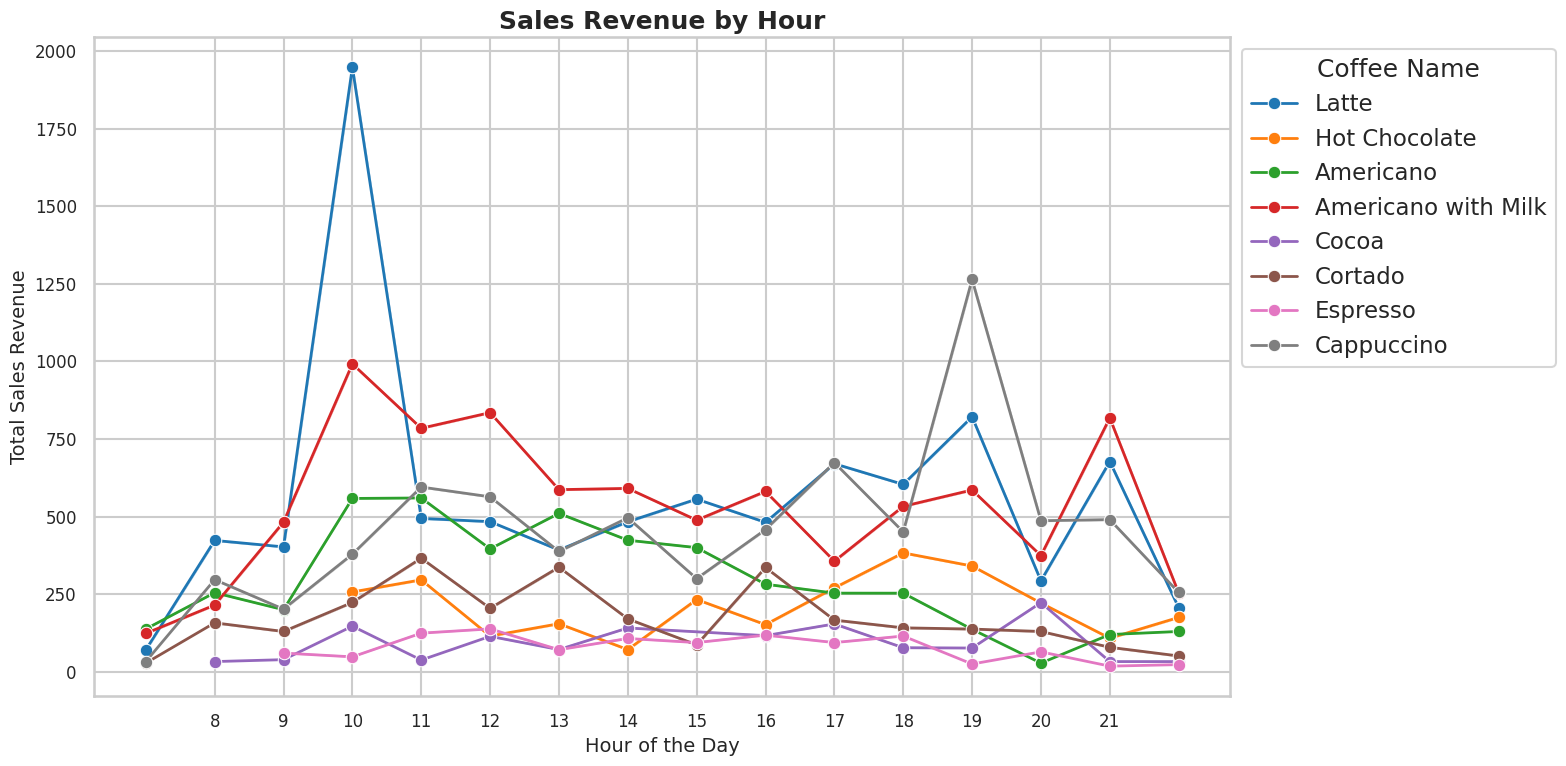

In [35]:
plt.figure(figsize=(16, 8))

# Set seaborn style
sns.set(style="whitegrid")
sns.set_context("talk")

# Plot line chart
ax = sns.lineplot(
    data=df,
    x="hour",
    y="hourly_sales",
    hue="coffee_name",
    marker="o",
    palette="tab10",  # clean and distinct colors
    linewidth=2
)

# Add title and labels
plt.title("Sales Revenue by Hour", fontsize=18, fontweight='bold')
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Total Sales Revenue", fontsize=14)
plt.xticks(range(8, 22))  # assuming hours are from 8 to 21
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Move legend outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Coffee Name")

# Clean layout
plt.tight_layout()
plt.show()

In [36]:
df.head(10)

,date,datetime,cash_type,money,coffee_name,month,day,hour,minute,second,day_of_week,weekday_name,monthly_sales,daily_sales,hourly_sales
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte,3,1,10,15,50,4,Friday,1874.5,152.84,1948.04
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,3,1,12,19,22,4,Friday,854.0,154.80,115.12
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,3,1,12,20,18,4,Friday,854.0,154.80,115.12
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano,3,1,13,46,33,4,Friday,1044.8,57.80,510.40
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte,3,1,13,48,14,4,Friday,1874.5,152.84,392.38
5,2024-03-01,2024-03-01 15:39:47.726,card,33.8,Americano with Milk,3,1,15,39,47,4,Friday,1154.0,401.68,488.60
6,2024-03-01,2024-03-01 16:19:02.756,card,38.7,Hot Chocolate,3,1,16,19,2,4,Friday,854.0,154.80,151.86
7,2024-03-01,2024-03-01 18:39:03.580,card,33.8,Americano with Milk,3,1,18,39,3,4,Friday,1154.0,401.68,533.16
8,2024-03-01,2024-03-01 19:22:01.762,card,38.7,Cocoa,3,1,19,22,1,4,Friday,232.2,115.42,76.42
9,2024-03-01,2024-03-01 19:23:15.887,card,33.8,Americano with Milk,3,1,19,23,15,4,Friday,1154.0,401.68,585.86


# **Label Encoding**

In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original DataFrame
df_encoded = df.copy()

# List of categorical columns to encode
categorical_cols = ['cash_type', 'coffee_name', 'weekday_name']

# Initialize encoder
le = LabelEncoder()

# Apply encoding to each column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [38]:
df_encoded.head()

,date,datetime,cash_type,money,coffee_name,month,day,hour,minute,second,day_of_week,weekday_name,monthly_sales,daily_sales,hourly_sales
0,2024-03-01,2024-03-01 10:15:50.520,0,38.7,7,3,1,10,15,50,4,0,1874.5,152.84,1948.04
1,2024-03-01,2024-03-01 12:19:22.539,0,38.7,6,3,1,12,19,22,4,0,854.0,154.80,115.12
2,2024-03-01,2024-03-01 12:20:18.089,0,38.7,6,3,1,12,20,18,4,0,854.0,154.80,115.12
3,2024-03-01,2024-03-01 13:46:33.006,0,28.9,0,3,1,13,46,33,4,0,1044.8,57.80,510.40
4,2024-03-01,2024-03-01 13:48:14.626,0,38.7,7,3,1,13,48,14,4,0,1874.5,152.84,392.38


# **Feature Selection and Target Variable**

In [39]:
x =df_encoded[["money", "hour", "hourly_sales", "monthly_sales", "minute",  "month", "day" , "coffee_name"]]
y =df_encoded["daily_sales"]

# **Model Building**

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Random Forest Regressor Model**

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

# Evaluate Random Forest model on the test set
rf_test_score = rf_model.score(X_test, y_test)
print(f"Random Forest Test R² Score: {rf_test_score:.4f}")

Random Forest Test R² Score: 0.8235


## **Result DataFrame with Actual vs Predicted Values**

In [42]:
# Create DataFrame for Actual vs Predicted values (RF)
result_rf = pd.DataFrame()
result_rf['datetime'] = df_encoded['datetime'].values  # Assuming you have a datetime column
result_rf['Predicted_RF'] = np.concatenate([rf_model.predict(X_train), rf_model.predict(X_test)])
result_rf['Actual'] = np.concatenate([y_train, y_test])
print(result_rf.head())

                 datetime  Predicted_RF  Actual
0 2024-03-01 10:15:50.520     274.39422  268.58
1 2024-03-01 12:19:22.539     241.59416  222.40
2 2024-03-01 12:20:18.089     254.47908  260.82
3 2024-03-01 13:46:33.006     191.65964  152.16
4 2024-03-01 13:48:14.626     233.15784  218.48


## **Model Evaluation Metrics (Overall Train + Test Data)**

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate MAE, RMSE, and R² Score for RF
mae_rf = mean_absolute_error(result_rf['Actual'], result_rf['Predicted_RF'])
rmse_rf = np.sqrt(mean_squared_error(result_rf['Actual'], result_rf['Predicted_RF']))
r2_rf = r2_score(result_rf['Actual'], result_rf['Predicted_RF'])

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MAE: 20.67
Random Forest RMSE: 31.47
Random Forest R² Score: 0.9473


## **XGB Regressor Model**

In [44]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
xgb_model = xgb.fit(X_train, y_train)

# Evaluate XGBoost model on the test set
xgb_test_score = xgb_model.score(X_test, y_test)
print(f"XGBoost Test R² Score: {xgb_test_score:.4f}")

XGBoost Test R² Score: 0.8388


## **Result DataFrame with Actual vs Predicted Values**



In [45]:
# Create DataFrame for Actual vs Predicted values (XGB)
result_xgb = pd.DataFrame()
result_xgb['datetime'] = df_encoded['datetime'].values  # Assuming you have a datetime column
result_xgb['Predicted_XGB'] = np.concatenate([xgb_model.predict(X_train), xgb_model.predict(X_test)])
result_xgb['Actual'] = np.concatenate([y_train, y_test])
print(result_xgb.head())

                 datetime  Predicted_XGB  Actual
0 2024-03-01 10:15:50.520     268.580658  268.58
1 2024-03-01 12:19:22.539     222.399124  222.40
2 2024-03-01 12:20:18.089     260.819702  260.82
3 2024-03-01 13:46:33.006     152.162537  152.16
4 2024-03-01 13:48:14.626     218.480881  218.48


## **Model Evaluation Metrics (Overall Train + Test Data)**

In [46]:
# Calculate MAE, RMSE, and R² Score for XGB
mae_xgb = mean_absolute_error(result_xgb['Actual'], result_xgb['Predicted_XGB'])
rmse_xgb = np.sqrt(mean_squared_error(result_xgb['Actual'], result_xgb['Predicted_XGB']))
r2_xgb = r2_score(result_xgb['Actual'], result_xgb['Predicted_XGB'])

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

XGBoost MAE: 7.59
XGBoost RMSE: 23.77
XGBoost R² Score: 0.9700


## **Visualization of Actual and Predicted Values**

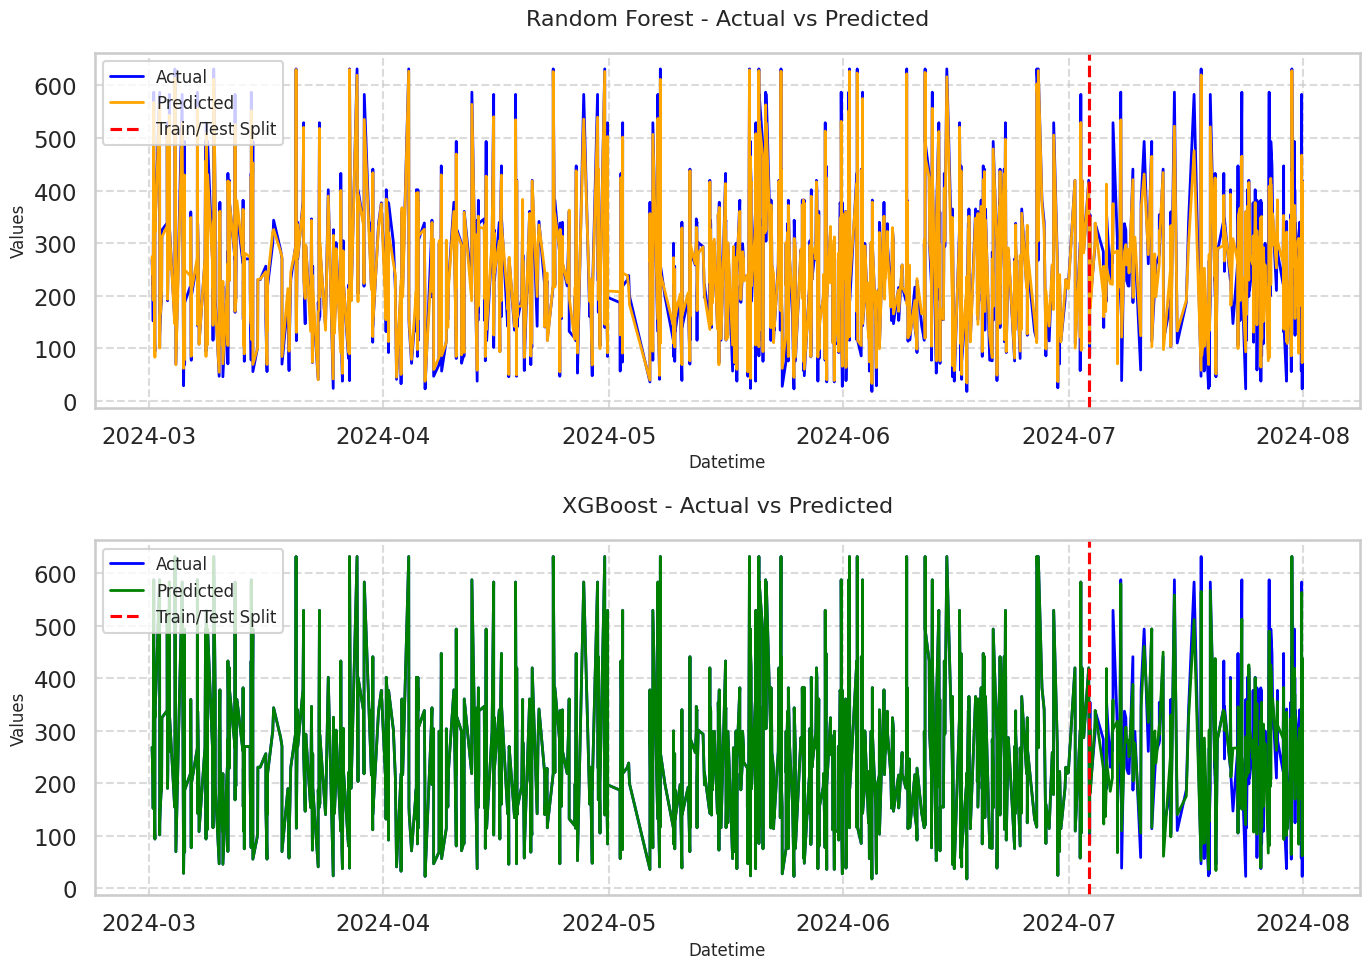

In [47]:
# Create subplots for Random Forest and XGBoost
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot for Random Forest
sns.lineplot(x=result_rf['datetime'], y=result_rf['Actual'], label='Actual', ax=ax1, color='blue', linewidth=2)
sns.lineplot(x=result_rf['datetime'], y=result_rf['Predicted_RF'], label='Predicted', ax=ax1, color='orange', linewidth=2)
ax1.axvline(x=df_encoded.iloc[len(X_train)].datetime, color='red', linestyle='--', label='Train/Test Split')
ax1.set_title('Random Forest - Actual vs Predicted', fontsize=16, pad=20)  # Increased padding
ax1.set_xlabel('Datetime', fontsize=12)
ax1.set_ylabel('Values', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for XGBoost
sns.lineplot(x=result_xgb['datetime'], y=result_xgb['Actual'], label='Actual', ax=ax2, color='blue', linewidth=2)
sns.lineplot(x=result_xgb['datetime'], y=result_xgb['Predicted_XGB'], label='Predicted', ax=ax2, color='green', linewidth=2)
ax2.axvline(x=df_encoded.iloc[len(X_train)].datetime, color='red', linestyle='--', label='Train/Test Split')
ax2.set_title('XGBoost - Actual vs Predicted', fontsize=16, pad=20)  # Increased padding
ax2.set_xlabel('Datetime', fontsize=12)
ax2.set_ylabel('Values', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlapping
plt.tight_layout(pad=1.0)
plt.show()

# **Daily Sales Forecast for Next 14 Days Using FBProphet**

In [48]:
df_prophet = df[['datetime', 'daily_sales']].rename(columns={'datetime':'ds', 'daily_sales':'y'})
df_prophet

,ds,y
0,2024-03-01 10:15:50.520,152.84
1,2024-03-01 12:19:22.539,154.80
2,2024-03-01 12:20:18.089,154.80
3,2024-03-01 13:46:33.006,57.80
4,2024-03-01 13:48:14.626,152.84
...,...,...
1128,2024-07-31 20:53:35.077,120.00
1129,2024-07-31 20:59:25.013,298.80
1130,2024-07-31 21:26:26.000,419.62
1131,2024-07-31 21:54:11.824,419.62


In [49]:
prophet_df = pd.DataFrame()
prophet_df['ds'] = df['datetime']
prophet_df['y'] = df['daily_sales']

prophet_df = prophet_df.sort_values('ds').reset_index(drop=True)

In [50]:
prophet_df

,ds,y
0,2024-03-01 10:15:50.520,152.84
1,2024-03-01 12:19:22.539,154.80
2,2024-03-01 12:20:18.089,154.80
3,2024-03-01 13:46:33.006,57.80
4,2024-03-01 13:48:14.626,152.84
...,...,...
1128,2024-07-31 20:53:35.077,120.00
1129,2024-07-31 20:59:25.013,298.80
1130,2024-07-31 21:26:26.000,419.62
1131,2024-07-31 21:54:11.824,419.62


In [51]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1p620atn/cb_hmjuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1p620atn/s14pkwbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55712', 'data', 'file=/tmp/tmp1p620atn/cb_hmjuw.json', 'init=/tmp/tmp1p620atn/s14pkwbv.json', 'output', 'file=/tmp/tmp1p620atn/prophet_modelbcw0h9tt/prophet_model-20250614092720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:27:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:27:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


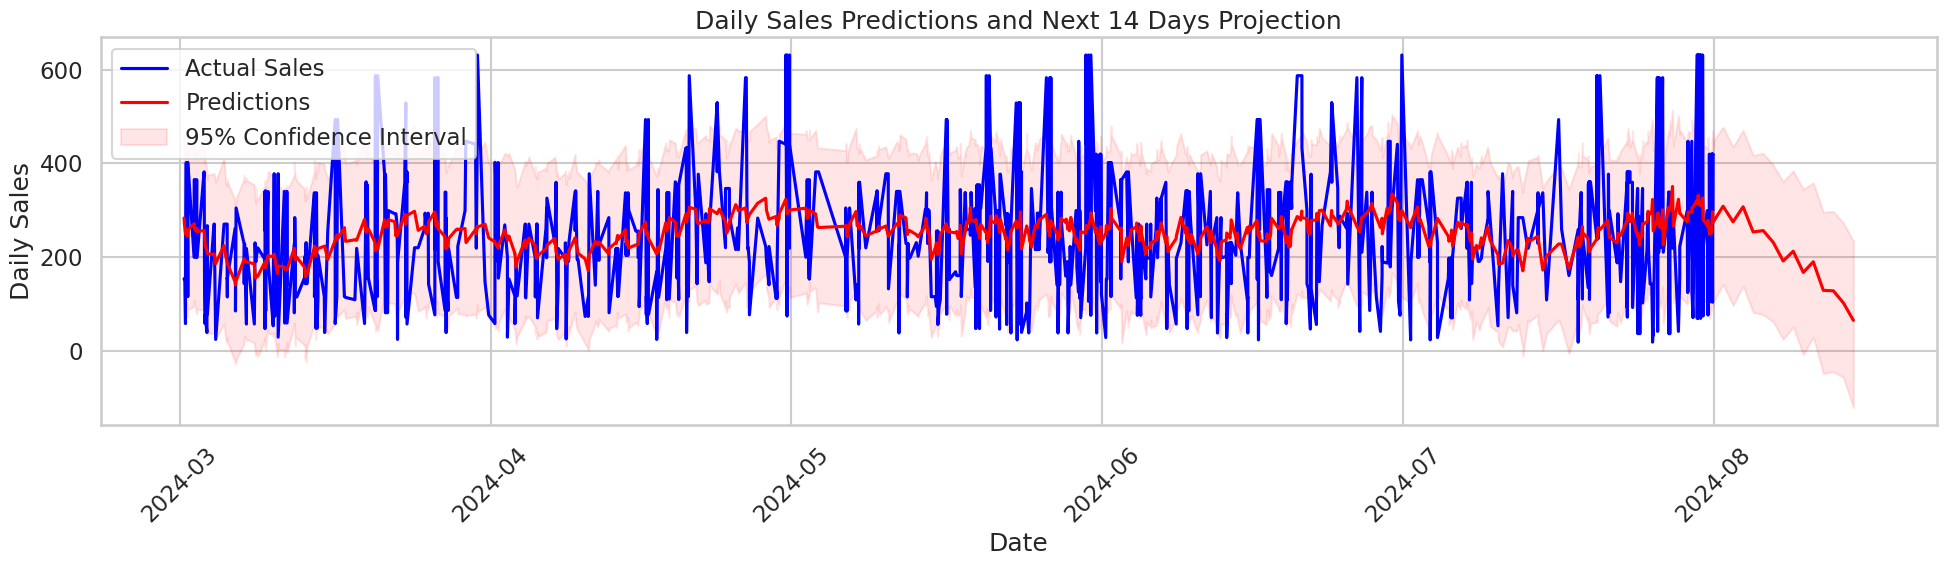

In [52]:
from prophet import Prophet
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative'
)

prophet_model.fit(prophet_df)

future_dates = prophet_model.make_future_dataframe(periods=14, freq='D')
forecast = prophet_model.predict(future_dates)

fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Sales', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Predictions', color='red', linestyle='-')

plt.fill_between(forecast['ds'],
                forecast['yhat_lower'],
                forecast['yhat_upper'],
                color='red',
                alpha=0.1,
                label='95% Confidence Interval')

plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
print("\nNext 14 Days Sales Predictions:")
future_predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_predictions.columns = ['Date', 'Predicted Sales', 'Lower Bound', 'Upper Bound']
print(future_predictions.round(2).to_string(index=False))


Next 14 Days Sales Predictions:
                   Date  Predicted Sales  Lower Bound  Upper Bound
2024-08-01 21:55:16.570           308.41       141.15       477.59
2024-08-02 21:55:16.570           274.98        96.80       435.18
2024-08-03 21:55:16.570           307.28       138.25       470.39
2024-08-04 21:55:16.570           253.43        81.82       416.99
2024-08-05 21:55:16.570           256.38        76.62       421.30
2024-08-06 21:55:16.570           231.38        61.95       396.64
2024-08-07 21:55:16.570           191.40        24.07       360.61
2024-08-08 21:55:16.570           212.39        50.66       384.06
2024-08-09 21:55:16.570           166.99        -8.81       344.76
2024-08-10 21:55:16.570           189.80        29.15       358.23
2024-08-11 21:55:16.570           128.77       -49.06       295.86
2024-08-12 21:55:16.570           127.76       -44.99       297.34
2024-08-13 21:55:16.570           102.01       -57.29       272.88
2024-08-14 21:55:16.570      


Component Analysis:


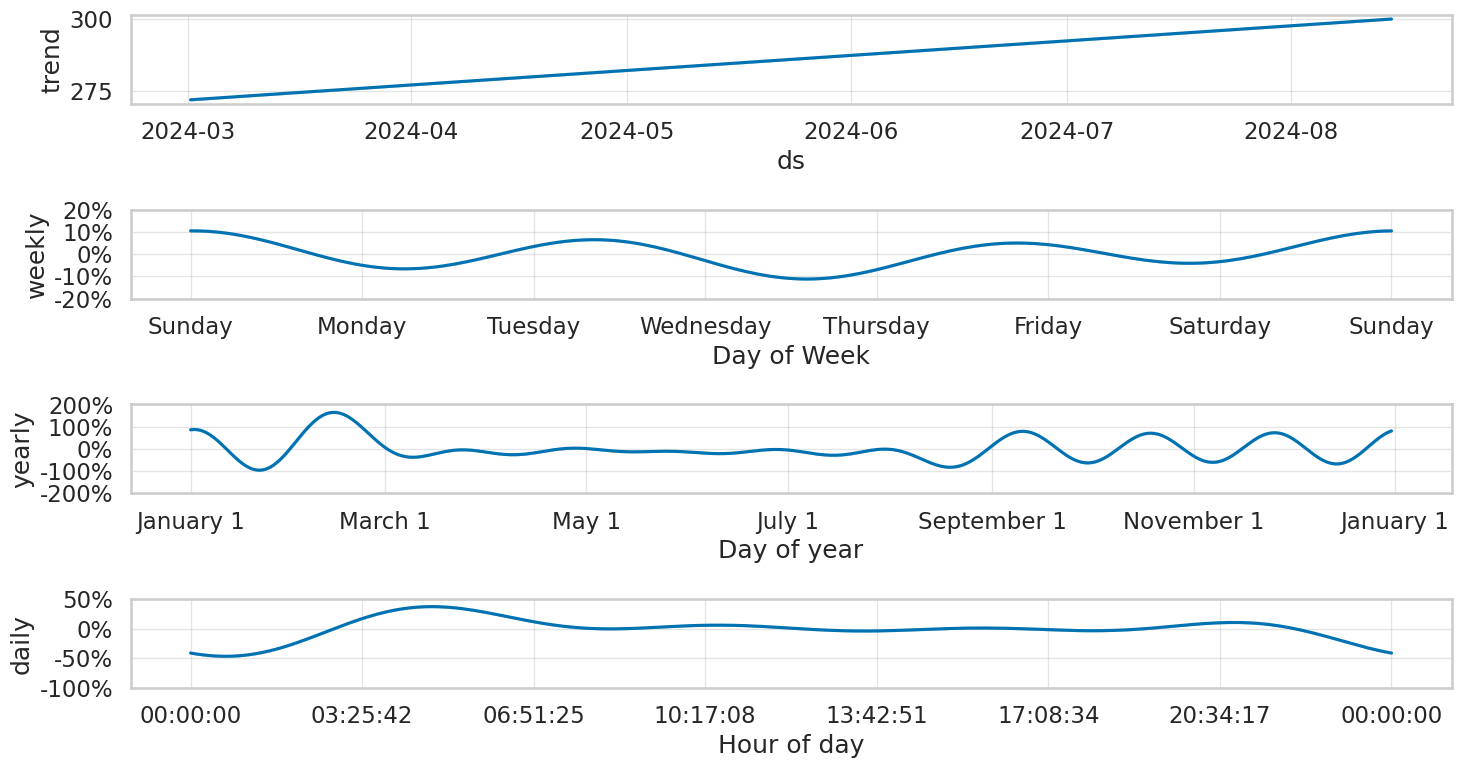

In [54]:
print("\nComponent Analysis:")
fig2 = prophet_model.plot_components(forecast, figsize=(15,8));
plt.show()

# **Correlation Heatmap**

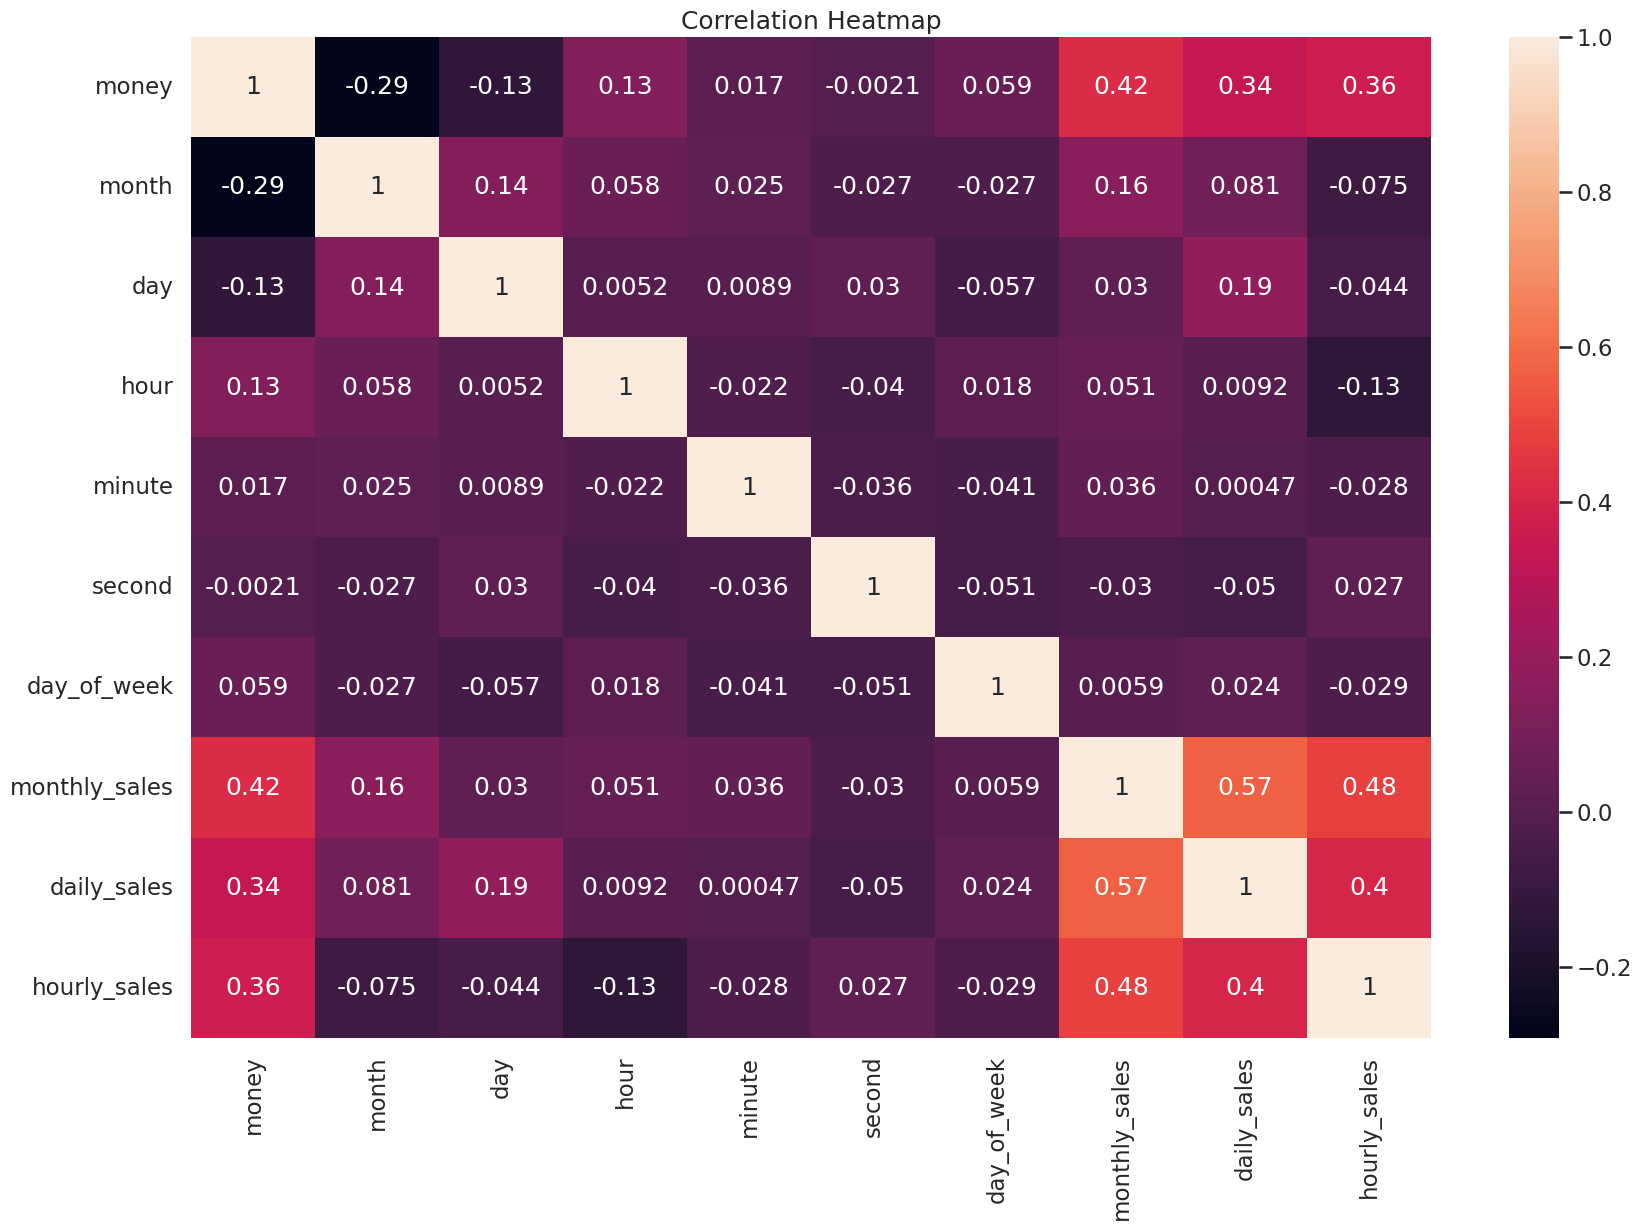

In [55]:
numerical_features = df.select_dtypes(include=['number', 'bool']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **Conclusion**
In this project, we analyzed coffee sales data to gain important insights and developed machine learning models to predict future sales. Through data preprocessing, exploratory data analysis (EDA), and modeling processes, we gained valuable information on coffee sales trends, popular products, and payment methods.

## **Key Findings:**



*   It was observed that sales increased on certain days and
months.
*  The most preferred coffee types and payment methods were determined.

*   Regression models such as Random Forest, and XGBoost showed promising results in predicting daily sales.

*  The Facebook Prophet model performed well in time series forecasts and produced sales forecasts for the next 14 days.  



